<a href="https://colab.research.google.com/github/v-jhonattan/Transfer_Learning/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.1 MB/s eta 0:00:00


In [22]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [23]:
tf.__version__

'2.20.0'

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images  = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0
classes = list(range(10))

In [25]:
def make_model():
    m = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return m

In [26]:
model = make_model()
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.8895 - loss: 0.3576 - val_accuracy: 0.9841 - val_loss: 0.0510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9918 - val_loss: 0.0256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9930 - loss: 0.0238 - val_accuracy: 0.9893 - val_loss: 0.0332
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9923 - val_loss: 0.0283


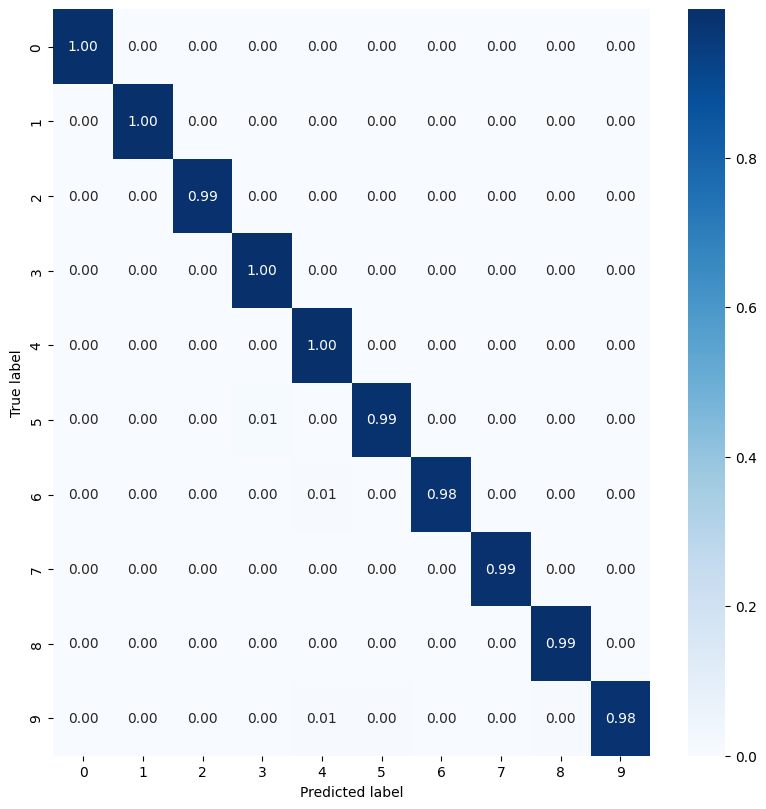

In [27]:
y_true = test_labels
y_pred_probs = model.predict(test_images, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.nan_to_num(con_mat / con_mat.sum(axis=1, keepdims=True), nan=0.0)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)
plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues, fmt=".2f")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [34]:
logdir = 'logs/images'
file_writer = tf.summary.create_file_writer(logdir + '/cm')
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)


In [35]:
def log_confusion_matrix(epoch, logs):
    # Predição no conjunto de validação
    test_pred = np.argmax(model1.predict(test_images, verbose=0), axis=1)

    con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
    con_mat_norm = np.nan_to_num(con_mat / con_mat.sum(axis=1, keepdims=True), nan=0.0)
    con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

    fig = plt.figure(figsize=(8,8))
    sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues, fmt=".2f")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)

    with file_writer.as_default():
        tf.summary.image("Confusion Matrix", image, step=epoch)

cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)


In [32]:
model1 = make_model()
model1.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    callbacks=[tb_callback, cm_callback],
    verbose=0
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
def metrics_from_confusion(VP, VN, FP, FN, beta=1.0):
    VP = float(VP); VN = float(VN); FP = float(FP); FN = float(FN)
    N = VP + VN + FP + FN

    # Acurácia
    acc = (VP + VN) / N if N else 0.0

    # Precisão (P)
    prec = VP / (VP + FP) if (VP + FP) else 0.0

    # Sensibilidade / Recall (S ou TPR)
    rec = VP / (VP + FN) if (VP + FN) else 0.0

    # Especificidade (TNR)
    spec = VN / (VN + FP) if (VN + FP) else 0.0

    # F-score (F1 quando beta=1)
    if prec + rec:
        fbeta = (1 + beta**2) * (prec * rec) / (beta**2 * prec + rec)
    else:
        fbeta = 0.0

    return {
        "N": N,
        "Acuracia": acc,
        "Precisao": prec,
        "Sensibilidade(Recall)": rec,
        "Especificidade": spec,
        f"F{beta}": fbeta
    }



In [37]:
# --- Exemplo didático com matriz arbitrária ---
VP, VN, FP, FN = 50, 40, 10, 5
res = metrics_from_confusion(VP, VN, FP, FN, beta=1.0)
for k, v in res.items():
    print(f"{k}: {v:.4f}")

N: 105.0000
Acuracia: 0.8571
Precisao: 0.8333
Sensibilidade(Recall): 0.9091
Especificidade: 0.8000
F1.0: 0.8696


In [38]:
def confusion_table(VP, VN, FP, FN):
    mat = np.array([[VP, FN],
                    [FP, VN]], dtype=int)
    df = pd.DataFrame(mat,
                      index=["Positivo (Real=1)", "Negativo (Real=0)"],
                      columns=["Pred=1", "Pred=0"])
    return df

confusion_table(VP, VN, FP, FN)

,Pred=1,Pred=0
Positivo (Real=1),50,5
Negativo (Real=0),10,40
